<a href="https://colab.research.google.com/github/BossAyush07/Deep-Learning-Projects/blob/master/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importing the dataset
dataset = pd.read_csv('train.csv')
dataset.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
5,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
6,6865200140,20140529T000000,485000.0,4,1.00,1600,4300,1.5,0,0,4,7,1600,0,1916,0,98103,47.6648,-122.343,1610,4300
7,6300500875,20140514T000000,385000.0,4,1.75,1620,4980,1.0,0,0,4,7,860,760,1947,0,98133,47.7025,-122.341,1400,4980
8,7137970340,20140703T000000,285000.0,5,2.50,2270,6300,2.0,0,0,3,8,2270,0,1995,0,98092,47.3266,-122.169,2240,7005
9,8091400200,20140516T000000,252700.0,2,1.50,1070,9643,1.0,0,0,3,7,1070,0,1985,0,98030,47.3533,-122.166,1220,8386


vizualizing


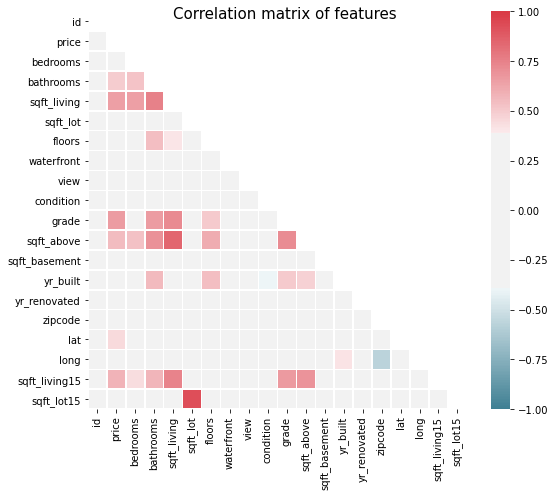

In [12]:
#visualizing the correlation between different features
import seaborn as sns
corr = dataset.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)

fig.tight_layout()

In [14]:
#removing varibles with minimum correlation
#more the correlation more the particular feature impacts the final output of the model
y=dataset.iloc[:,2].values
x=dataset.iloc[:,[4,5,11,12,19,3,13,9,17,7,8]].values

In [15]:
#importing the linear regression form sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#using polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(x)
poly_reg.fit(x_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#importing the test set
test_set=pd.read_csv('test.csv')
y_true=test_set.iloc[:,2].values
x_test=test_set.iloc[:,[4,5,11,12,19,3,13,9,17,7,8]].values

In [22]:
#predicting result with linear regression
y_pred=lin_reg.predict(x_test)
print(y_pred)

[288739.36481426 449614.39945157 173693.17240844 ... 638576.32700739
 353499.60732368 466245.29303683]


In [23]:
# Predicting a new result with Polynomial Regression
y_pred2=lin_reg_2.predict(poly_reg.fit_transform(x_test))
print(y_pred2)

[290107.39481735 455639.25888157 153286.02842617 ... 659905.57199383
 477977.82979679 500331.91427326]


In [24]:
#using r2 score as metrics to compare
from sklearn.metrics import r2_score
linear_r2=r2_score(y_true,y_pred)
poly_r2=r2_score(y_true,y_pred2)
print(linear_r2)
print(poly_r2)

0.6498099086995488
0.7191545378671722
